<a href="https://colab.research.google.com/github/SebiBarson/DIP_Project/blob/sebastian/dip_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Edge detection using morphological operations**

Step 1: importing libraries

We will use:
  - cv2 (OpenCV 2) for image actions (i.e. grayscale)
  - matplotlib.pyplot for plotting images
  - numpy for matrix manipulation

In [229]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Step 2: defining basic functions

toBackground() converts an object pixel to a background pixel, leaving the background pixels alone

In [230]:
def toBackground(pixel):
  if(isObjectPixel(pixel)):
    return 255 - pixel
  else:
    return pixel

toObject() converts a background pixel to an object pixel, leaving the object pixels alone

In [231]:
def toObject(pixel):
  if(isObjectPixel(pixel)):
    return pixel
  else:
    return 225 - pixel

isObjectPixel() returns True if the pixel is considered an object pixel and False otherwise

In [232]:
def isObjectPixel(pixel):
  if(pixel < 127):
    return True
  else:
    return False

expandImg()
Here we get into the morphological functions, this one implementing the expansion: Over every pixel a structural element is applied. If any object pixels are found in the structural element, the pixel becomes itself an object pixel. We first go over the "body" of the image: the image without the edges. Then, we analyze the edges, and finally the corner pixels.

In [233]:
def expandImg(image):
  result = np.zeros([len(image), len(image[0])]).astype(int)
  h = len(image)
  w = len(image[0])

  #body:
  for i in range(1, h-1):
    for j in range(1, w-1):
      if(isObjectPixel(image[i-1][j]) or isObjectPixel(image[i+1][j]) or isObjectPixel(image[i][j-1]) or isObjectPixel(image[i][j+1])):
        if(isObjectPixel(image[i][j])):
          result[i][j] = image[i][j]
          print(i,j)
        else:
          result[i][j] = toObject(image[i][j])
          print("Sth else",i,j)

  #sides:
  for j in range(1, w-1):
      if(isObjectPixel(image[1][j]) or isObjectPixel(image[0][j-1]) or isObjectPixel(image[0][j+1])):
        result[0][j] = toObject(image[0][j])
      if(isObjectPixel(image[h-2][j]) or isObjectPixel(image[h-1][j-1]) or isObjectPixel(image[h-1][j+1])):
        result[h-1][j] = toObject(image[h-1][j])

  for i in range(1, h-1):
      if(isObjectPixel(image[i-1][0]) or isObjectPixel(image[i+1][0]) or isObjectPixel(image[i][1])):
        result[i][0] = toObject(image[i][0])
      if(isObjectPixel(image[i-1][w-1]) or isObjectPixel(image[i+1][w-1]) or isObjectPixel(image[i][w-2])):
        result[i][w-1] = toObject(image[i][w-1])

  #corners:
  if(isObjectPixel(image[1][0]) or isObjectPixel(image[0][1])):
    result[0][0] = toObject(image[0][0])
  if(isObjectPixel(image[0][w-2]) or isObjectPixel(image[1][w-1])):
    result[0][w-1] = toObject(image[0][w-1])
  if(isObjectPixel(image[h-1][1]) or isObjectPixel(image[h-2][0])):
    result[h-1][0] = toObject(image[h-1][0])
  if(isObjectPixel(image[h-2][w-1]) or isObjectPixel(image[h-1][w-2])):
    result[h-1][w-1] = toObject(image[h-1][w-1])

  np.matrix.view(result)
  return result

erodeImg() implements the erosion: Over every pixel a structural element is applied. If any background pixels are found in the structural element, the pixel becomes itself abackground pixel. We first go over the "body" of the image: the image without the edges. Then, we analyze the edges, and finally the corner pixels.

In [234]:
def erodeImg(image):
  result = np.zeros([len(image), len(image[0])]).astype(int)
  h = len(image)
  w = len(image[0])
  
  for i in range(1, h):
      for j in range(1, w):
        if(isObjectPixel(image[i][j])):
          result[i][j] = image[i][j]

  #body:
  for i in range(1, h-1):
    for j in range(1, w-1):
      if(((isObjectPixel(image[i-1][j]) == False)) or (isObjectPixel(image[i+1][j]) == False) or (isObjectPixel(image[i][j-1]) == False) or (isObjectPixel(image[i][j+1]) == False)):
        result[i][j] = toBackground(image[i][j])

  #sides:
  for j in range(1, w-1):
      if((isObjectPixel(image[1][j]) == False) or (isObjectPixel(image[0][j-1]) == False) or (isObjectPixel(image[0][j+1] == False))):
        result[0][j] = toBackground(image[0][j])
      if((isObjectPixel(image[h-2][j]) == False) or (isObjectPixel(image[h-1][j-1]) == False) or (isObjectPixel(image[h-1][j+1]) == False)):
        result[h-1][j] = toBackground(image[h-1][j])

  for i in range(1, h-1):
      if((isObjectPixel(image[i-1][0]) == False) or (isObjectPixel(image[i+1][0]) == False) or (isObjectPixel(image[i][1]) == False)):
        result[i][0] = toBackground(image[i][0])
      if((isObjectPixel(image[i-1][w-1]) == False) or (isObjectPixel(image[i+1][w-1]) == False) or (isObjectPixel(image[i][w-2]) == False)):
        result[i][w-1] = toBackground(image[i][w-1])

  #corners:
  if((isObjectPixel(image[1][0]) == False) or (isObjectPixel(image[0][1]) == False)):
    result[0][0] = toBackground(image[0][0])
  if((isObjectPixel(image[0][w-2]) == False) or (isObjectPixel(image[1][w-1]) == False)):
    result[0][w-1] = toBackground(image[0][w-1])
  if((isObjectPixel(image[h-1][1]) == False) or (isObjectPixel(image[h-2][0]) == False)):
    result[h-1][0] = toBackground(image[h-1][0])
  if((isObjectPixel(image[h-2][w-1]) == False) or (isObjectPixel(image[h-1][w-2]) == False)):
    result[h-1][w-1] = toBackground(image[h-1][w-1])

  
  return result

By definition, opening an image means eroding it and then expanding the eroded image. The openImg() function does just that:

In [235]:
def openImg(image):
  return expandImg(erodeImg(image))

By definition, closing an image means expanding it and then eroding the expanded image. The closeImg() function does just that:

In [236]:
def closeImg(image):
  return erodeImg(expandImg(image))

Time to import our image

In [237]:
InputIm_FileName="img.png"
InImg=cv2.imread(InputIm_FileName,0)

Here we test the morphological functions implemented previously

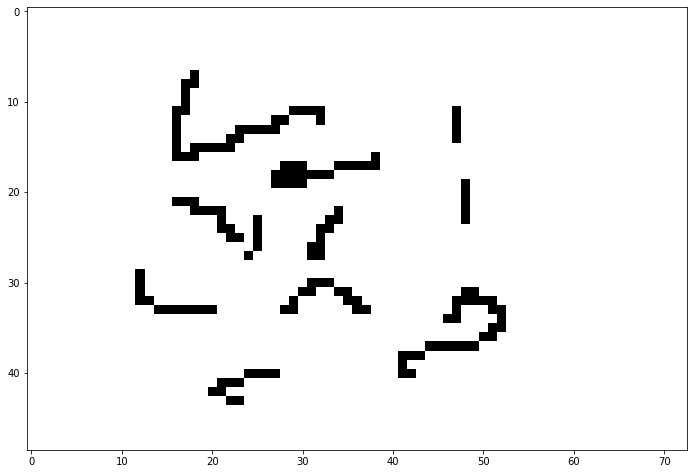

In [238]:
H,W=InImg.shape
DPI=40
plt.figure(figsize=(W/DPI+10,H/DPI+10))
plt.imshow(InImg,cmap = 'gray')
plt.show()

Sth else 6 18
Sth else 7 17
7 18
Sth else 7 19
Sth else 8 16
8 17
8 18
Sth else 8 19
Sth else 9 16
9 17
Sth else 9 18
Sth else 10 16
10 17
Sth else 10 18
Sth else 10 29
Sth else 10 30
Sth else 10 31
Sth else 10 32
Sth else 10 47
Sth else 11 15
11 16
11 17
Sth else 11 18
Sth else 11 27
Sth else 11 28
11 29
11 30
11 31
11 32
Sth else 11 33
Sth else 11 46
11 47
Sth else 11 48
Sth else 12 15
12 16
Sth else 12 17
Sth else 12 23
Sth else 12 24
Sth else 12 25
Sth else 12 26
12 27
12 28
Sth else 12 29
Sth else 12 30
Sth else 12 31
12 32
Sth else 12 33
Sth else 12 46
12 47
Sth else 12 48
Sth else 13 15
13 16
Sth else 13 17
Sth else 13 22
13 23
13 24
13 25
13 26
13 27
Sth else 13 28
Sth else 13 32
Sth else 13 46
13 47
Sth else 13 48
Sth else 14 15
14 16
Sth else 14 17
Sth else 14 18
Sth else 14 19
Sth else 14 20
Sth else 14 21
14 22
14 23
Sth else 14 24
Sth else 14 25
Sth else 14 26
Sth else 14 27
Sth else 14 46
14 47
Sth else 14 48
Sth else 15 15
15 16
Sth else 15 17
15 18
15 19
15 20
15 21
15 

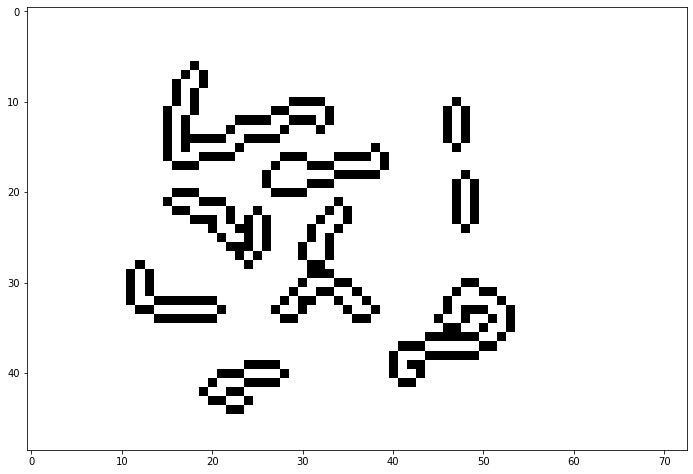

In [239]:

plt.figure(figsize=(W/DPI+10,H/DPI+10))
plt.imshow(expandImg(InImg),cmap = 'gray')
print(expandImg(InImg)[17][37])
plt.show()

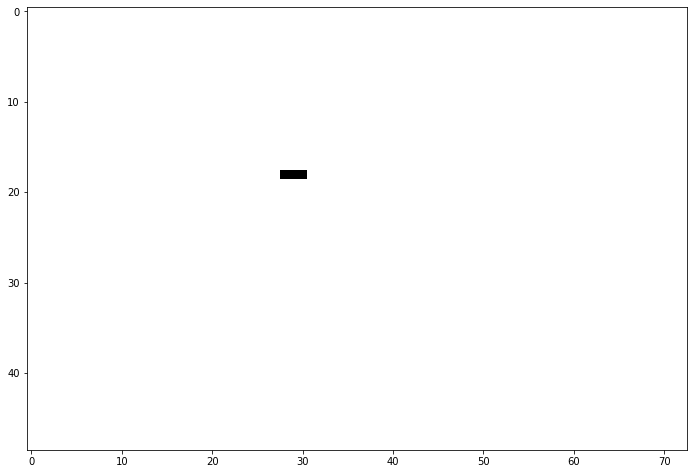

In [240]:
plt.figure(figsize=(W/DPI+10,H/DPI+10))
plt.imshow(erodeImg(InImg),cmap = 'gray')
plt.show()

Sth else 17 28
Sth else 17 29
Sth else 17 30
Sth else 18 27
18 28
18 29
18 30
Sth else 18 31
Sth else 19 28
Sth else 19 29
Sth else 19 30


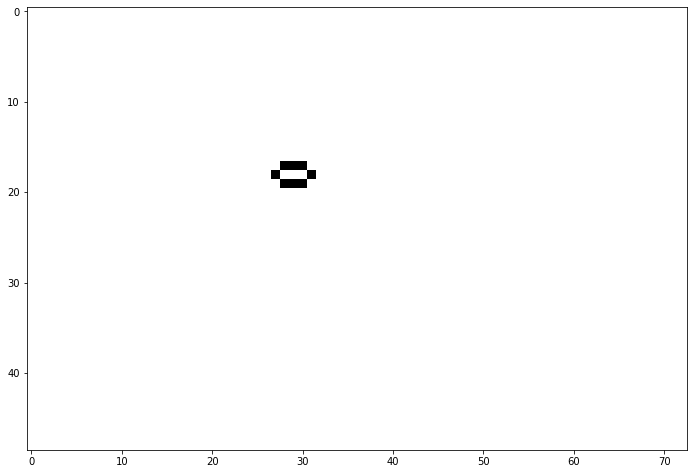

In [241]:
plt.figure(figsize=(W/DPI+10,H/DPI+10))
plt.imshow(openImg(InImg),cmap = 'gray')
plt.show()

Sth else 6 18
Sth else 7 17
7 18
Sth else 7 19
Sth else 8 16
8 17
8 18
Sth else 8 19
Sth else 9 16
9 17
Sth else 9 18
Sth else 10 16
10 17
Sth else 10 18
Sth else 10 29
Sth else 10 30
Sth else 10 31
Sth else 10 32
Sth else 10 47
Sth else 11 15
11 16
11 17
Sth else 11 18
Sth else 11 27
Sth else 11 28
11 29
11 30
11 31
11 32
Sth else 11 33
Sth else 11 46
11 47
Sth else 11 48
Sth else 12 15
12 16
Sth else 12 17
Sth else 12 23
Sth else 12 24
Sth else 12 25
Sth else 12 26
12 27
12 28
Sth else 12 29
Sth else 12 30
Sth else 12 31
12 32
Sth else 12 33
Sth else 12 46
12 47
Sth else 12 48
Sth else 13 15
13 16
Sth else 13 17
Sth else 13 22
13 23
13 24
13 25
13 26
13 27
Sth else 13 28
Sth else 13 32
Sth else 13 46
13 47
Sth else 13 48
Sth else 14 15
14 16
Sth else 14 17
Sth else 14 18
Sth else 14 19
Sth else 14 20
Sth else 14 21
14 22
14 23
Sth else 14 24
Sth else 14 25
Sth else 14 26
Sth else 14 27
Sth else 14 46
14 47
Sth else 14 48
Sth else 15 15
15 16
Sth else 15 17
15 18
15 19
15 20
15 21
15 

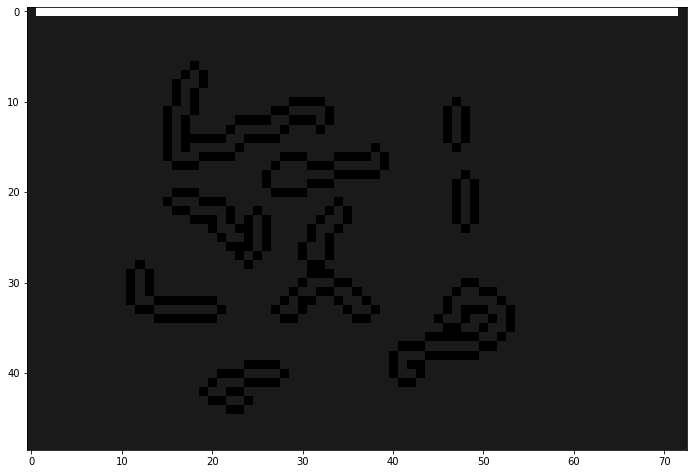

In [242]:
plt.figure(figsize=(W/DPI+10,H/DPI+10))
plt.imshow(closeImg(InImg),cmap = 'gray')
plt.show()